# Map:
- what problems is the model trying to solve
- learn by fitting a model to data
- optimize a cost function
- handling, cleaning, and preparing data
- select and engineering features
- select a model and tuning hyperparameters using cross-validation
- address underfitting or overfitting (bias/variance tradeoff)
- reduce dimension of the training data to address dimensionality
- use other machine learning techniques (unsupervised)
- ML algorithms (linear, polynomial, logistic regression, KNN, SVM, Decision Trees, Random Forest, Ensemble)

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/refs/heads/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.csv"
#https://raw.githubusercontent.com/ageron/handson-ml2/refs/heads/master/datasets/housing/housing.csv
HOUSING_PATH = os.path.join("datasets", "housing") #datasets/housing


import pandas as pd
def load_housing_data(housing_path):
    return pd.read_csv(housing_path)

housing = load_housing_data(HOUSING_URL)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
#value_counts = count of unique values
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


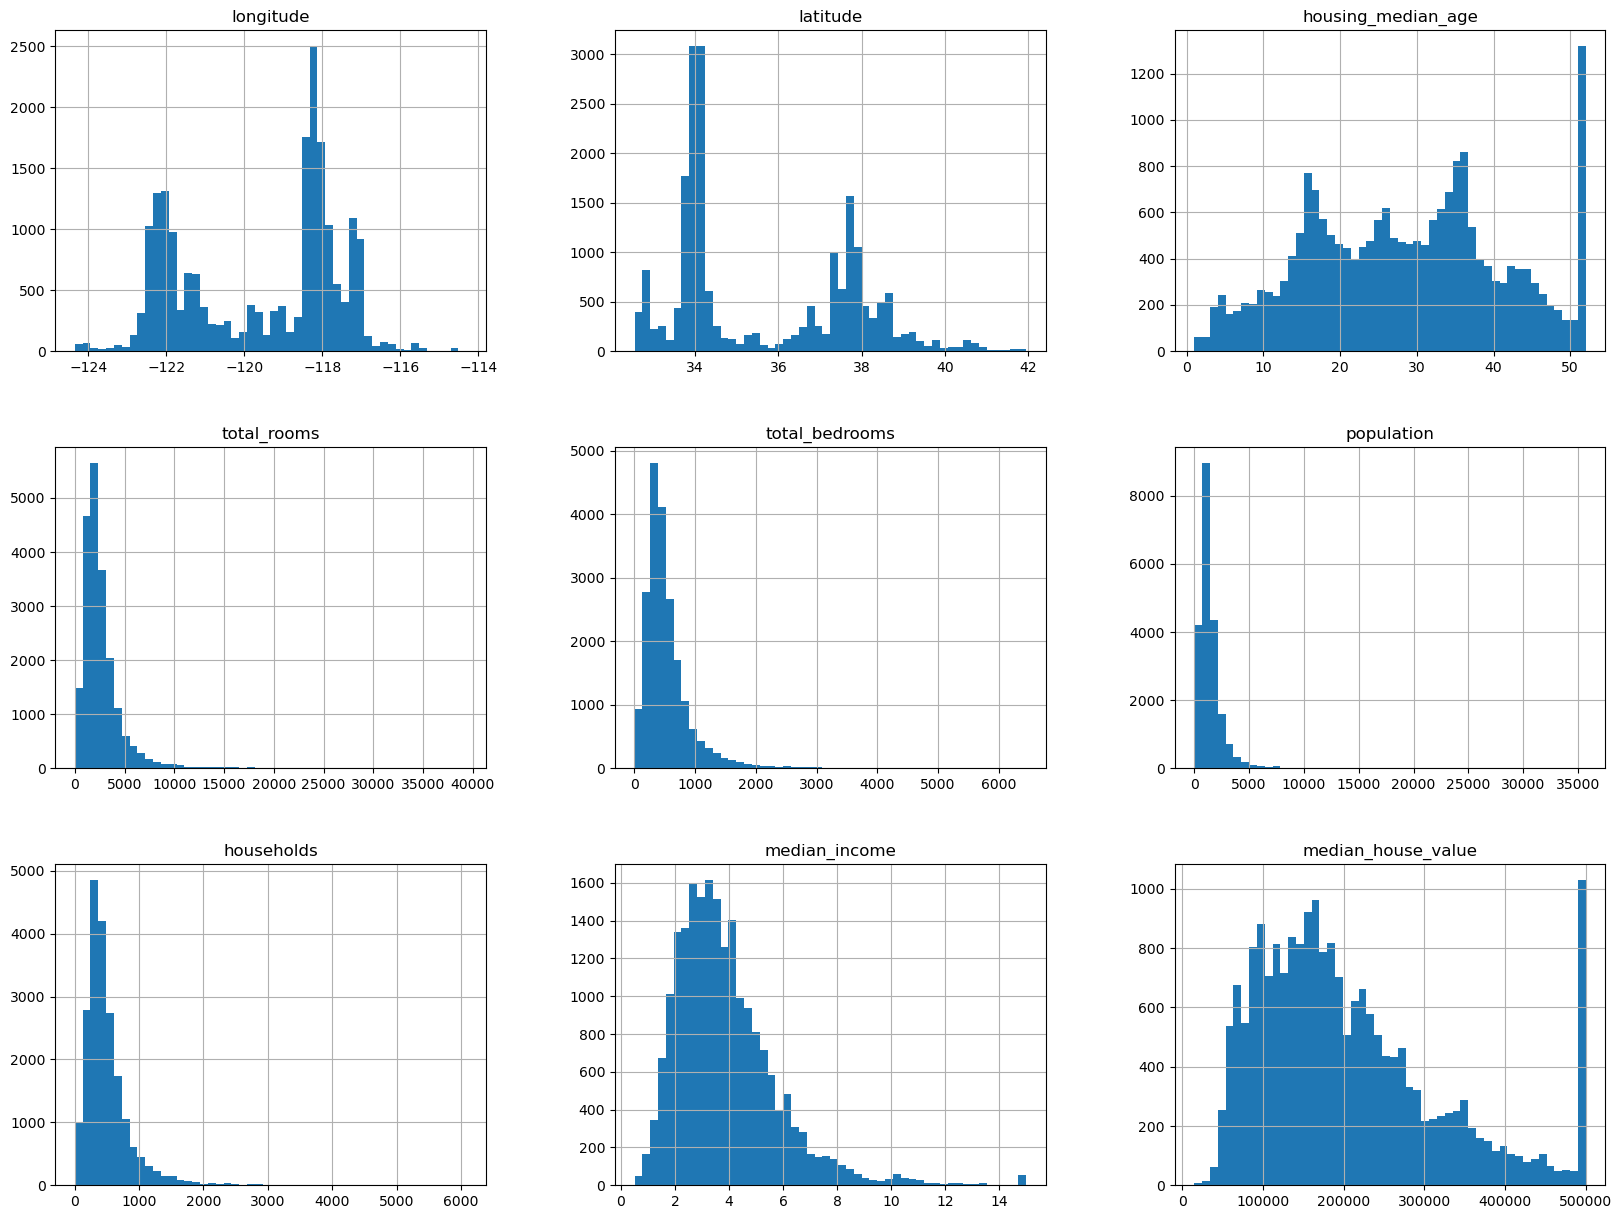

In [5]:
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [6]:
import numpy as np

np.random.seed(42)

shuffle = np.random.permutation(len(housing)) #shuffle data
train_split = int(len(housing) * 0.2) #split into 80% train, 20% test

X_train, y_train = shuffle[train_split:], shuffle[train_split:] # 80% and below = train
X_test, y_test = shuffle[:train_split], shuffle[:train_split] # 20% and above = test


len(X_train), len(y_train), len(X_test), len(y_test)

(16512, 16512, 4128, 4128)

In [7]:
housing_with_id = housing.reset_index()
housing_with_id.head(1)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [8]:
#combine longitude and latitude
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] #give a bigger weight
housing_with_id['id'] #have a unique id

0       -122192.12
1       -122182.14
2       -122202.15
3       -122212.15
4       -122212.15
           ...    
20635   -121050.52
20636   -121170.51
20637   -121180.57
20638   -121280.57
20639   -121200.63
Name: id, Length: 20640, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [10]:
len(train_set), len(test_set)

(16512, 4128)

In [11]:
#sort median income into bins/categories to because it is clustered around the middle

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0, 1.5, 3, 4.5, 6, np.inf],
                               labels = [1,2,3,4,5])

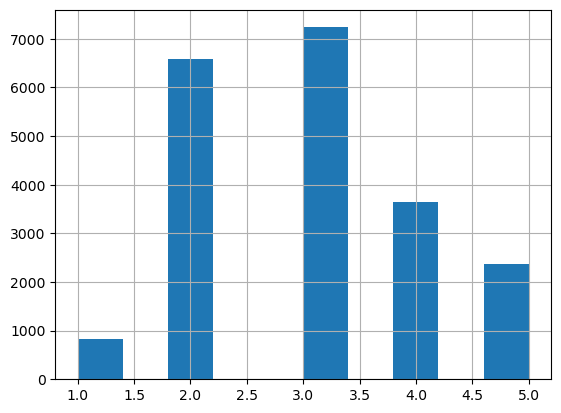

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

housing["income_cat"].hist()
plt.show()

### Note
**StratifiedShuffleSplit**:
- cross validation
- split data into train and test
- ensures that categories are proportionally represented in both train and test sets
- maintain proportion of the target (income category)

In [13]:
# stratified sampling based on income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

#access the indices
for train_i, test_j in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_i]
    strat_test_set = housing.loc[test_j]

In [14]:
len(strat_train_set), len(strat_test_set)

(16512, 4128)

In [15]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:
#drop income_cat col in strat_train and test sets
for i in (strat_train_set, strat_test_set):
    i.drop("income_cat", axis = 1, inplace = True)

In [17]:
housing = strat_train_set.copy()

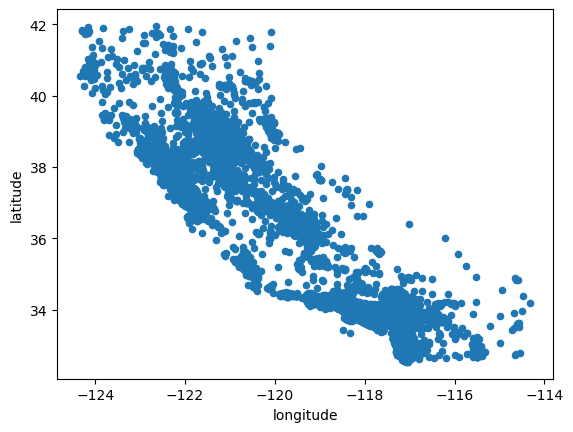

In [18]:
housing.plot.scatter(x = "longitude", y = "latitude")
plt.show()

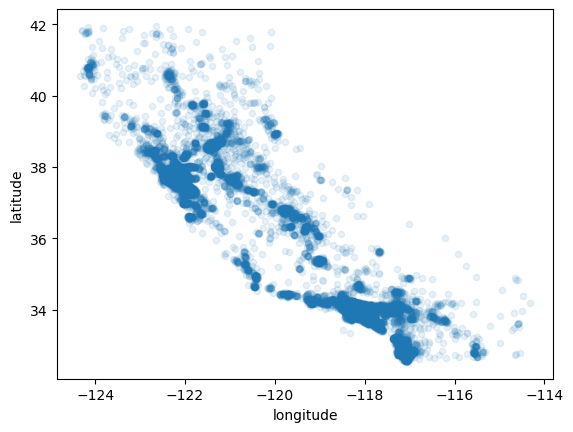

In [19]:
#to show higher density, set alpha
housing.plot.scatter( x = "longitude", y = "latitude", alpha = 0.1)
plt.show()

In [20]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND


### Note:
- plot longitude as x, latitude as y
- use population to label
- use median_house_value to color
- use jet color scheme to paint the color of the median_house_value
- use colors to represent data values
  

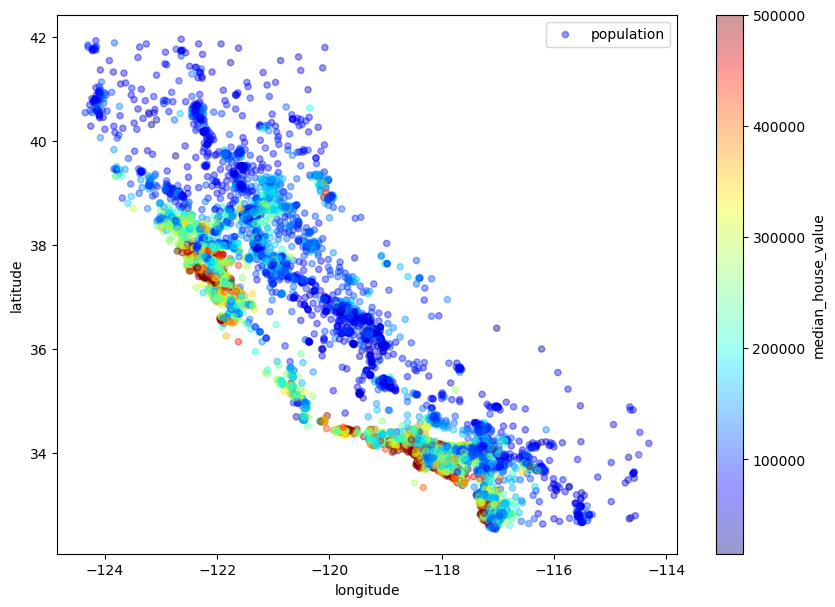

In [21]:
housing.plot.scatter(x ="longitude", y = "latitude", alpha = 0.4, 
                     label = "population",
                     figsize = (10,7),
                     c = "median_house_value",
                     cmap = plt.get_cmap("jet"),
                     colorbar = True)

plt.show()

*fig: median house prices are higher around the bay areas*

In [22]:
housing["median_house_value"].unique()

array([ 72100., 279600.,  82700., ..., 478600., 242400.,  34600.])

In [23]:
housing_no_ocean = housing.drop(["ocean_proximity"], axis = 1)
housing_no_ocean.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0


### Note:
Correlation ranges from -1 to 1

If close to 1:
- strong pos corr
- ex: median house value goes up, median income goes up

If close to -1:
- strong neg corr
- ex: prices go down when houses are not around the bay (houses in north)\

If close to 0:
- no correlation

In [24]:
#look for correlations using standard correlation coefficient

#median_house_value against all columns
corr_matrix = housing_no_ocean.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

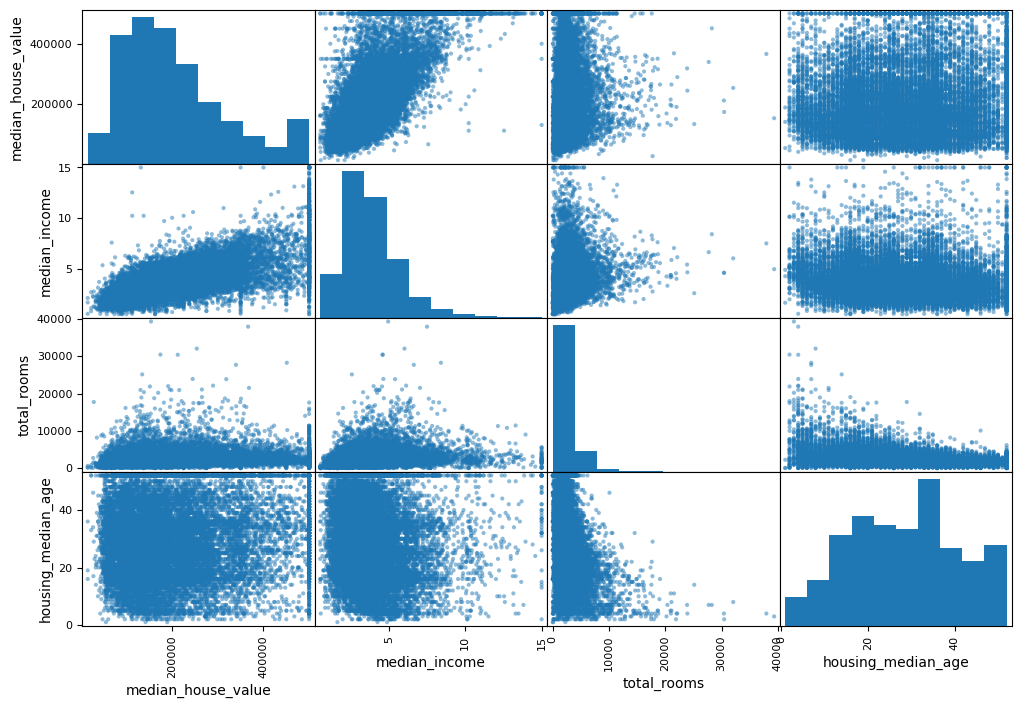

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()

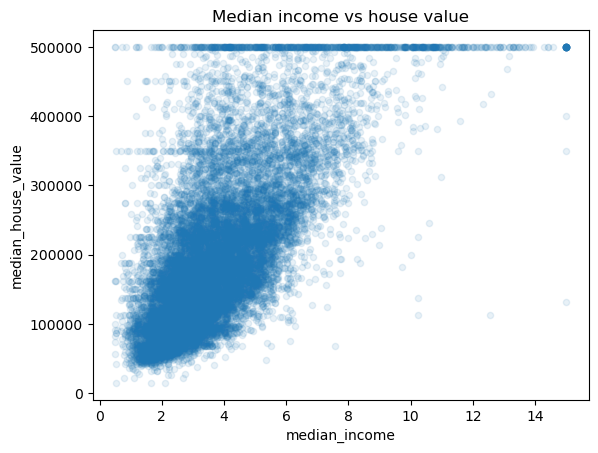

In [26]:
housing.plot.scatter(x = "median_income", y = "median_house_value", alpha = 0.1)
plt.title("Median income vs house value")
plt.show()

*fig: strong correlation, price cap is at $500,000*

# Prepare Data for ML

## Clean

In [27]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [29]:
#drop na
housing.drop("total_bedrooms", axis = 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [30]:
# or... handle missing values with sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median") #replace NaN with median value of the column
housing_num = housing.drop("ocean_proximity", axis = 1) #drop useless col
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [32]:
housing_num.median()

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [33]:
X = imputer.transform(housing_num)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [34]:
#construct a new dataframe using transformed X
housing_transform = pd.DataFrame(X, columns = housing_num.columns)
housing_transform

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


## Handle Texts


In [35]:
housing[["ocean_proximity"]] #only get the column

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [36]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(1)

,ocean_proximity
12655,INLAND


In [37]:
from sklearn.preprocessing import OrdinalEncoder

#convert texts to numbers ID
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) 
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

### Note ONE HOT ENCODING:
- the columns are not smallest to biggest category like "bad", "good", "excellent"
- the columns are "INLAND", "ISLAND", "NEAR BAY"
- we need to convert them to 0 and 1
- where ex: 1 = INLAND, 0 = not INLAND
- ex: 1 = ISLAND, 0 = not ISLAND

In [38]:
housing_cat.head(5)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


### Note FIT_TRANSFORM():
- combines fit() and transform() together
- fit() = calculates something from the data (mean, median, scaling factors..)
- transform() = applies the "fill missing values", "scales features" to the data

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
#turn housing_cat_onehot to numpy array
housing_cat_onehot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Custom Transformer


Implement:
- ft() - return self
- transform()
- fit_transform()

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

#transformermixin = fit_transform()
#baseestimator = get_params(), set_params()

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [43]:
# use this to create additional columns in a dataset

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y = None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)

#no use fit_transform because it has a fit function?
#because the fit function does nothing

#we want to transform the .values of housing by using attr_adder(CombinedAttributesAdder)
housing_extra_attributes = attr_adder.transform(housing.values) #numpy array


In [93]:
# transform data back to dataframe
og_columns = list(housing.columns)

extra_attributes = ["rooms_per_household", "population_per_household"]
if attr_adder.add_bedrooms_per_room:
    extra_attributes.append('bedrooms_per_room')


#add old and new cols together and convert to df
new_cols = og_columns + extra_attributes
housing_extra_df = pd.DataFrame(housing_extra_attributes, columns=new_cols)

In [94]:
housing_extra_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### Notes:
- X[:, rooms_ix] selects all row in the assigned column (3)

### Example using fit_transform and .values

In [44]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample DataFrame
fd= pd.DataFrame({
    'height': [5.5, 6.0, 5.8],
    'weight': [150, 180, 160]
})

In [45]:
fd

,height,weight
0,5.5,150
1,6.0,180
2,5.8,160


In [46]:
# Convert to NumPy array and scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fd.values)
#fit_tranform = learns the stanardscaler, transform each .values of the data by using standardscaler (scaler)
print(scaled_data)

[[-1.29777137 -1.06904497]
 [ 1.13554995  1.33630621]
 [ 0.16222142 -0.26726124]]


## Feature Scaling
- use it when ML algo has a liot of numerical attributes with different scales
- only fit the scalers to training data, NOT full dataset and NOT test set
- use to transform training set and new test set

Example: 
- two columns of (house size, number of rooms)
- house sizes are often huge
- number of rooms are small numbers

Result?
- ML algorithms tend to use bigger numbers more effectively
- imbalanced model
  
### Option 1 = use min-max (normalization)

**Nomalization**
- values rescaled so they end up ranging from 0 to 1
- subtract min value and divide by the max minus min
- (val - val min)/(val max - val min)

**MinMaxScaler**
- feature_range param that can be used to change the range
- same thing as the above, with extra step
- X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
- X_scaled = X_std * (max - min) + min

### Option 2 = use standardization

**StandardScaler**
- (val - mean)/ std

## Transformation Pipelines

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#apply multiple transformations to the data
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "median")), #replace nan with median
        ("attribs_adder", CombinedAttributesAdder()), #add features
        ("std_scaler", StandardScaler()), #scale to normalize data
])

housing_num_transform = num_pipeline.fit_transform(housing_num)
housing_num_transform[:5]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178,  0.2512412 ,  0.00610923,
        -0.47451338]])

In [96]:
# Original numerical column names
original_num_attribs = list(housing_num.columns)

# Extra attributes added by CombinedAttributesAdder
extra_attributes = ['rooms_per_household', 'population_per_household']
if num_pipeline.named_steps["attribs_adder"].add_bedrooms_per_room:
    extra_attributes.append('bedrooms_per_room')


new_column_names = original_num_attribs + extra_attributes
housing_num_df = pd.DataFrame(housing_num_transform, columns=new_column_names)

housing_num_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513


In [48]:
""" 
Column Transformer to clean and prepare data automatically
get list of numerical col names
get list of categorical col names
construct ColumnTransformer
var name = ColumnTransformer([(any name, transformer, name of columns to apply to)])
apply constructed num_pipeline for numerical, OneHotEncoder() for categorical
apply the ColumnTransformer to the housing data
"""

' \nColumn Transformer to clean and prepare data automatically\nget list of numerical col names\nget list of categorical col names\nconstruct ColumnTransformer\nvar name = ColumnTransformer([(any name, transformer, name of columns to apply to)])\napply constructed num_pipeline for numerical, OneHotEncoder() for categorical\napply the ColumnTransformer to the housing data\n'

In [49]:
#single transformer to handle all columns
#apply appropriate transformations to each columns

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) #get the col names
cat_attribs = ['ocean_proximity'] #only have 1 categorical col

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #returns dense matrix (Na filled with 0)
        ("cat", OneHotEncoder(), cat_attribs)]) #returns sparse matrix (Na left empty)

In [50]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [51]:
housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

## Select and Train a model

In [53]:
# housing_labels = strat_train_set["median_house_value"].copy()
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [54]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [55]:
#testing
#use some_data_prepared to predict the labels
some_data = housing.iloc[:5] #get first 5 random rows
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [56]:
print("Labels: ", list(some_labels))

Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [57]:
#not accurate predicitons
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [58]:
#measure Root MSE on the actual data
#purpose = measure how much error from the median housing values
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions) #(atual value, prediction value)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
#error of $68,627 

68627.87390018745

In [59]:
#to fix underfitting, use more powerful model, to feed more features to regularize

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [60]:
# (use a model).predict(a transformed data)
housing_predictions = tree_reg.predict(housing_prepared)

# .mean_squared_error(correct values, estimated prediction values, weights)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse #no error (same actual value and predicted value)

0.0

### Note:
* This could mean the model overfit the data

In [61]:
housing_predictions[:5]

array([ 72100., 279600.,  82700., 112500., 238300.])

In [62]:
housing_labels[:5]

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [63]:
'''
Cross-Validation: evalutate the decision tree model 
use train_test_split and split training set into smaller training + validation sets
train the model against the smaller training, then evaluate using the validation sets
'''

'\nCross-Validation: evalutate the decision tree model \nuse train_test_split and split training set into smaller training + validation sets\ntrain the model against the smaller training, then evaluate using the validation sets\n'

In [64]:
# K-fold cross-validation
# randomly splits training set to 10 subsets (folds)
# train and eval the decision tree model 10 times

from sklearn.model_selection import cross_val_score

# cross_val_score(model type, prediction, actual set, scorer, folds)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring = "neg_mean_squared_error", cv = 10)
# neg_mean_squared_error = measure distance between model and data
tree_rmse_scores = np.sqrt(-scores)

In [65]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std()) #how precise the estimate is

display_scores(tree_rmse_scores)

Scores:  [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean:  71432.52332065887
Standard Deviation:  2696.6824522410743


In [66]:
#use cross_val_score on linear regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

#overfit

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.328209818068


In [67]:
#use RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [68]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                 scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([51340.22553753, 49240.079874  , 46976.40445657, 51917.1921677 ,
       47035.53338226, 51829.80557131, 52841.15437862, 49525.18429381,
       47962.29506428, 54069.20606905])

In [69]:
display_scores(forest_rmse_scores)

Scores:  [51340.22553753 49240.079874   46976.40445657 51917.1921677
 47035.53338226 51829.80557131 52841.15437862 49525.18429381
 47962.29506428 54069.20606905]
Mean:  50273.7080795117
Standard Deviation:  2357.685647654302


In [70]:
#save model
import joblib

joblib.dump(forest_reg, "random_forest_reg_model.pkl")

#load 
loaded_model = joblib.load("random_forest_reg_model.pkl")
loaded_model

RandomForestRegressor()

## Fine-Tune

### Grid Search - use manual hyperparams
- n_estimators: num of trees in the random forest
- max_features: num of features for each split (division of data)
- bootstrap: sampling with replacement, tree in the forest trained on a slightly different dataset

In [71]:
#use gridsearch with randomforestregressor
from sklearn.model_selection import GridSearchCV

param_grid =[
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]}, 
    {'bootstrap':[False], 'max_features':[2,3,4], 'n_estimators':[3,10]} 
] 
#3x4 = 12 combinations of hyperparam values
#3x2 = 6 combinations
#explore 12+6 = 18 combinations of randomforestregressor
#train the model 5 times (5 fold cross validation)
# total = 18 * 5 = 90 epochs 
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,
                           param_grid,
                           cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score = True)
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
#selects the best combinations using cross-validation
grid_search.best_params_ 

{'max_features': 6, 'n_estimators': 30}

In [74]:
#give a fully trained model with those params applied
#ready to use for predictions
grid_search.best_estimator_ 

RandomForestRegressor(max_features=6, n_estimators=30)

### NOTE:
- (negative mean score) = used as loss function (MSE, MAE)
- MSE is usually positive, but GridSearch negates it
- need to take the -mean_score to get the real MSE

In [75]:
#cross validation result

cvregressor = grid_search.cv_results_

#loop through paired (mean_test_scores and parameters)
for mean_score, params in zip(cvregressor['mean_test_score'], cvregressor['params']):
    print(np.sqrt(-mean_score), params)

63298.325280791854 {'max_features': 2, 'n_estimators': 3}
55270.34904709105 {'max_features': 2, 'n_estimators': 10}
52764.37907812309 {'max_features': 2, 'n_estimators': 30}
59915.231517953645 {'max_features': 4, 'n_estimators': 3}
52250.00971218671 {'max_features': 4, 'n_estimators': 10}
50523.76956271084 {'max_features': 4, 'n_estimators': 30}
58765.92610607112 {'max_features': 6, 'n_estimators': 3}
51730.966110363326 {'max_features': 6, 'n_estimators': 10}
49946.273624879475 {'max_features': 6, 'n_estimators': 30}
59277.60503739721 {'max_features': 8, 'n_estimators': 3}
52330.73545038374 {'max_features': 8, 'n_estimators': 10}
50227.668503643676 {'max_features': 8, 'n_estimators': 30}
62861.2715675933 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53857.8212549715 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60006.561171063295 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52604.14159908305 {'bootstrap': False, 'max_features': 3, 'n_estimators'

*Summary* : best solution is by setting max_features hyperparam to 8 and n_estimators to 30. The RMSE score is 50227.67. The default hyperparam value is *Mean:  50273.7080795117*

### Randomized Search CV
- explore few combinations
- use this when hyperparam search space is large
- instead of trying out all possible combinations, evaluate random combinations for each params
- can be used to run all the randomized search iterations
- can set number of iterations manually

### Analyze best models and errors

In [78]:
#importance of each attributes (cols) for making acurate predictions by grid_search
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.02540413e-02, 7.30975513e-02, 4.21462904e-02, 1.94599329e-02,
       1.66305656e-02, 1.82993131e-02, 1.50495682e-02, 3.03111918e-01,
       6.20480248e-02, 1.06221557e-01, 8.14535860e-02, 9.36554568e-03,
       1.67342766e-01, 6.92925556e-05, 1.89090481e-03, 3.55914297e-03])

In [89]:
extra_attributes = [ "rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attributes = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attributes + cat_one_hot_attributes

In [90]:
#how important is the column in making predictions
sorted(zip(feature_importances, attributes),reverse = True)

[(0.3031119176071169, 'median_income'),
 (0.16734276601874726, 'INLAND'),
 (0.10622155666897516, 'population_per_household'),
 (0.0814535860261664, 'bedrooms_per_room'),
 (0.08025404133343494, 'longitude'),
 (0.07309755133984223, 'latitude'),
 (0.06204802478201258, 'rooms_per_household'),
 (0.04214629041432651, 'housing_median_age'),
 (0.019459932868257434, 'total_rooms'),
 (0.018299313106456588, 'population'),
 (0.01663056564371583, 'total_bedrooms'),
 (0.01504956816998999, 'households'),
 (0.009365545680866467, '<1H OCEAN'),
 (0.0035591429730958816, 'NEAR OCEAN'),
 (0.001890904811381891, 'NEAR BAY'),
 (6.92925556139685e-05, 'ISLAND')]

### Evaluate model on Test set

In [98]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [100]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

In [101]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [106]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47491.48557683056

In [114]:
# how precise is the estimation?
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence,
                        len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45481.8075141 , 49419.50616749])

*result shows 95% confident that the expected average error lies somewhere between 45,481.81 and  49,419.51*

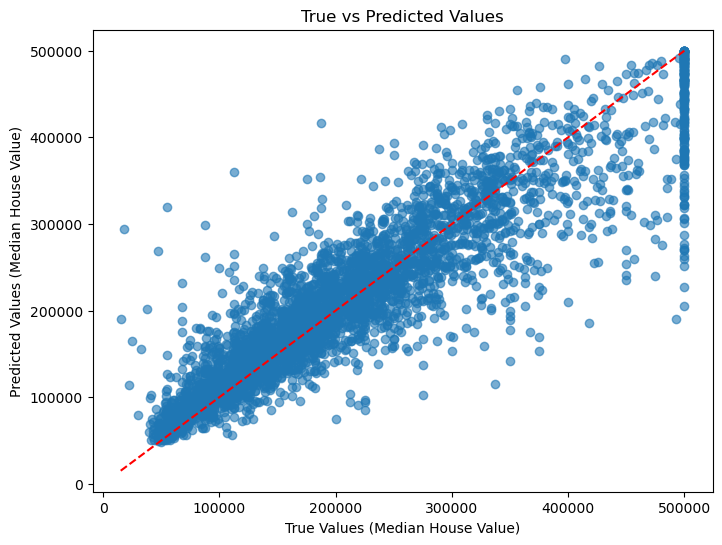

In [120]:
import matplotlib.pyplot as plt

# Scatter plot of True Values vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect predictions
plt.xlabel('True Values (Median House Value)')
plt.ylabel('Predicted Values (Median House Value)')
plt.title('True vs Predicted Values')
plt.show()

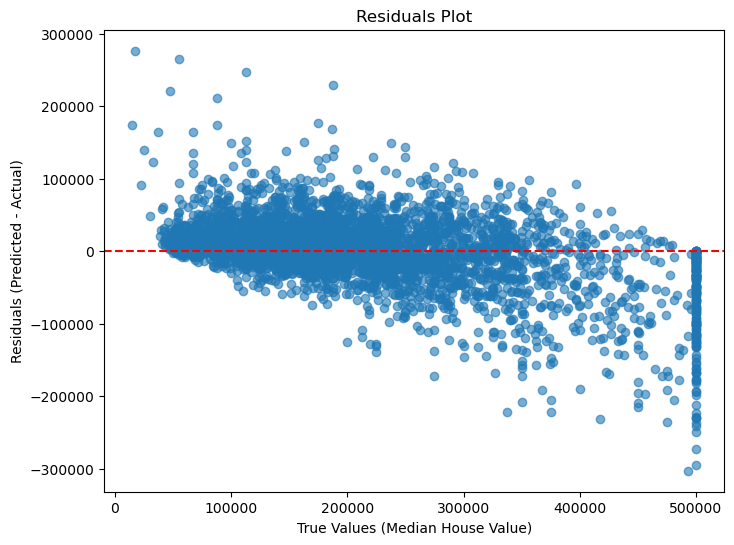

In [121]:
# Residuals plot (difference between predictions and actual values)
residuals = final_predictions - y_test

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Zero line (no error)
plt.xlabel('True Values (Median House Value)')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residuals Plot')
plt.show()

## Analysis

1. Objective
- Predict the price of houses based on household characteristics, with a focus on median income

2. Data Preparation
- Median income was divided into categories to avoid clustering of values
- **Stratified Sampling** was applied to ensure the data distribution reflects real-world distributions of income.
- Created new attributes to enhance predictive power of the model
  - *rooms_per_household*
  - *population_per_household*
  - *bedrooms_per_room*: ratio of bedrooms to rooms
- **Median imputer** was used to fill missing values with skewed house prices

3. Model Selection
- **Correlations**: median_house_value and median_income was 0.68, the highest correlation compared to other features in the dataset.
  - Suggests that median income is a strong predictor of house prices
- **Modeling Approach**:
  - *linear regression*
  - *decision tree regressor*
  - *random forest regressor*
- **Best Model**
  - After comparing RMSE(Root Mean Squared Error), the Random Forest Regressor performed the best, providing the lowest RMSE
 
4. Fine Tuning and Evaluation
- **Grid Search**
  - Fine-tuned the RandomForestRegressor using GridSearchCV to find the best hyperparameters and improve the model's performance
- **Evaluation**
  - Used 95% confidence interval
    - The results showed the average error lies between \\$45,481.81 and \\$49,419.51
    - 95% confident that the true average error in predicting house prices fall within this range

5. Conclusion
- The median income of households can be a good predictor of housing prices